In [91]:
# Importing the libraries 
import pandas as pd # Used to manipulate the dataframe
import numpy as np # Used for scientific calculations
import matplotlib.pyplot as plt # Used for data visualisation
import seaborn as sns # Used for data visualisation
import missingno as msno # Used for visualizing missing values 
import warnings # Used to remove warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
!pip install lightgbm
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import math # Used for mathematical operations
from IPython.display import Image # Used for displaying image
import warnings # Used to remove warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")
from sklearn import linear_model

In [92]:
# Importing the dataset
df = pd.read_excel('Dataset_Hackathon.xlsx')

In [93]:
# Displaying the dataset
df.head()

,Country,Commodity,Flow,Quantity,Category,Volume (m^3),Distance from India (m),Frieght Cost (USD)
0,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,34,02_meat_and_edible_meat_offal,12,"5,940.83","4,840.70"
1,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,23,02_meat_and_edible_meat_offal,12,"5,940.83","3,069.71"
2,Albania,"Swine meat, salted/dried/smoked not ham/should...",Export,11,02_meat_and_edible_meat_offal,12,"5,940.83","1,475.82"
3,Albania,"Fowls, domestic, whole, frozen",Export,50,02_meat_and_edible_meat_offal,12,"5,940.83","7,083.95"
4,Albania,"Meat and edible offal nes fresh, chilled or fr...",Export,71,02_meat_and_edible_meat_offal,12,"5,940.83","9,976.56"


In [94]:
# Importing the distance dataset
df2 = pd.read_csv('distances.csv')

In [95]:
# Displaying the distance dataset
df.head()

,Country,Commodity,Flow,Quantity,Category,Volume (m^3),Distance from India (m),Frieght Cost (USD)
0,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,34,02_meat_and_edible_meat_offal,12,"5,940.83","4,840.70"
1,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,23,02_meat_and_edible_meat_offal,12,"5,940.83","3,069.71"
2,Albania,"Swine meat, salted/dried/smoked not ham/should...",Export,11,02_meat_and_edible_meat_offal,12,"5,940.83","1,475.82"
3,Albania,"Fowls, domestic, whole, frozen",Export,50,02_meat_and_edible_meat_offal,12,"5,940.83","7,083.95"
4,Albania,"Meat and edible offal nes fresh, chilled or fr...",Export,71,02_meat_and_edible_meat_offal,12,"5,940.83","9,976.56"


In [96]:
# Creating a heatmap in the dataframe using viridis colour
df.head(10).style.background_gradient(cmap = "viridis")

,Country,Commodity,Flow,Quantity,Category,Volume (m^3),Distance from India (m),Frieght Cost (USD)
0,Albania,"Poultry cuts & offal, except livers, fresh or chilled",Export,34,02_meat_and_edible_meat_offal,12,5940.830501,4840.697837
1,Albania,"Poultry cuts & offal, except livers, fresh or chilled",Export,23,02_meat_and_edible_meat_offal,12,5940.830501,3069.710823
2,Albania,"Swine meat, salted/dried/smoked not ham/shoulder/bell",Export,11,02_meat_and_edible_meat_offal,12,5940.830501,1475.822511
3,Albania,"Fowls, domestic, whole, frozen",Export,50,02_meat_and_edible_meat_offal,12,5940.830501,7083.948054
4,Albania,"Meat and edible offal nes fresh, chilled or frozen",Export,71,02_meat_and_edible_meat_offal,12,5940.830501,9976.560176
5,Albania,"Meat and edible offal nes fresh, chilled or frozen",Re-Export,71,02_meat_and_edible_meat_offal,12,5940.830501,8978.904158
6,Albania,"Swine edible offal, fresh or chilled",Export,76,02_meat_and_edible_meat_offal,12,5940.830501,10684.954981
7,Albania,"Poultry, domestic, whole, fresh or chilled",Export,12,02_meat_and_edible_meat_offal,12,5940.830501,1830.019914
8,Albania,"Bovine cuts boneless, frozen",Export,56,02_meat_and_edible_meat_offal,12,5940.830501,7851.375760
9,Albania,"Bovine edible offal, fresh or chilled",Export,41,02_meat_and_edible_meat_offal,12,5940.830501,5726.191344


In [97]:
# Frieght cost is the amount paid to a carrier company for the transportation of goods from the point of origin to an agreed location

In [98]:
# Getting the first five rows of the dataframe
df.head()

,Country,Commodity,Flow,Quantity,Category,Volume (m^3),Distance from India (m),Frieght Cost (USD)
0,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,34,02_meat_and_edible_meat_offal,12,"5,940.83","4,840.70"
1,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,23,02_meat_and_edible_meat_offal,12,"5,940.83","3,069.71"
2,Albania,"Swine meat, salted/dried/smoked not ham/should...",Export,11,02_meat_and_edible_meat_offal,12,"5,940.83","1,475.82"
3,Albania,"Fowls, domestic, whole, frozen",Export,50,02_meat_and_edible_meat_offal,12,"5,940.83","7,083.95"
4,Albania,"Meat and edible offal nes fresh, chilled or fr...",Export,71,02_meat_and_edible_meat_offal,12,"5,940.83","9,976.56"


In [99]:
# Getting the last five rows of the dataframe
df.tail()

,Country,Commodity,Flow,Quantity,Category,Volume (m^3),Distance from India (m),Frieght Cost (USD)
81440,Malawi,"Oil seeds and oleaginous fruits, nes",Export,85,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,4,"6,170.00","2,767.34"
81441,Malawi,"Seed, beet, except sugar, for sowing",Export,3,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,4,"6,170.00",162.78
81442,Malawi,Soya beans,Export,1,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,4,"6,170.00",162.78
81443,Malawi,Ground-nuts in shell not roasted or cooked,Export,6,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,4,"6,170.00",284.87
81444,Malawi,Ground-nuts in shell not roasted or cooked,Re-Export,6,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,4,"6,170.00",256.39


In [100]:
# Getting the basic information about the dataframe
df.describe().transpose().style.background_gradient(cmap = "magma")

,count,mean,std,min,25%,50%,75%,max
Quantity,81445.000000,25.423513,26.428383,1.000000,4.000000,15.000000,40.000000,99.000000
Volume (m^3),81445.000000,9.187660,3.467300,4.000000,6.000000,9.000000,12.000000,15.000000
Distance from India (m),81445.000000,8625.160165,4517.370603,1013.270233,5523.110720,6862.215943,14042.410697,16969.664293
Frieght Cost (USD),81445.000000,3427.222531,5090.549325,33.711339,448.796316,1393.906270,4161.578000,44985.120504


In [101]:
# Getting basic information from the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81445 entries, 0 to 81444
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  81445 non-null  object 
 1   Commodity                81445 non-null  object 
 2   Flow                     81445 non-null  object 
 3   Quantity                 81445 non-null  int64  
 4   Category                 81445 non-null  object 
 5   Volume (m^3)             81445 non-null  int64  
 6   Distance from India (m)  81445 non-null  float64
 7   Frieght Cost (USD)       81445 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


In [102]:
# Checking if there is duplicate data in the dataframe
df.duplicated().sum()

9019

In [103]:
# We are keeping the duplicate data

In [104]:
# Checking if there are any null values in the dataframe
pd.options.display.max_rows= None # Shows all the rows
df.isnull().sum()

Country                    0
Commodity                  0
Flow                       0
Quantity                   0
Category                   0
Volume (m^3)               0
Distance from India (m)    0
Frieght Cost (USD)         0
dtype: int64

In [105]:
# We observe that there are no null values

In [106]:
# We move on to check which features correlates with the Predicted Shipment Cost the most

In [107]:
# Creating a list of column names for categorical and numerical features
cate_feat = list(df.select_dtypes(include = [object]).columns)
num_feat = list(df.select_dtypes(include = [int,float]).columns)

print(cate_feat)
print("\n")
print(num_feat)

['Country', 'Commodity', 'Flow', 'Category']


['Quantity', 'Volume (m^3)', 'Distance from India (m)', 'Frieght Cost (USD)']


Text(0.5, 1.0, 'ShipmentCost Correlation')

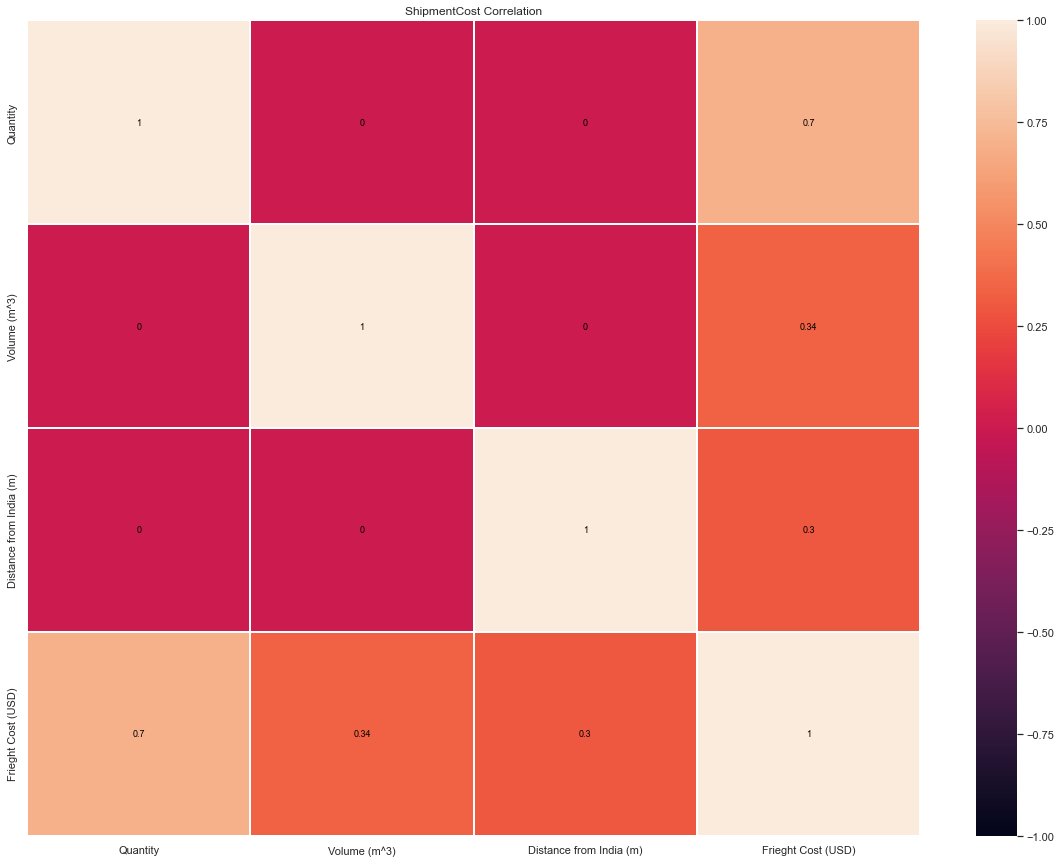

In [108]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'
# Defining the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format # Round off to two decimal places

# Defining the correlation matrix
corr_matrix = df[num_feat].corr()

# Replacing correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Plotting the heatmap
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, linewidths=0.1, annot_kws={"size": 9, "color": "black"},annot=True)
plt.title("ShipmentCost Correlation")

In [109]:
# Dropping the unrelated features
X1 = df.drop(['Country', 'Commodity','Flow','Category'], axis = 1)
X1.head()

,Quantity,Volume (m^3),Distance from India (m),Frieght Cost (USD)
0,34,12,"5,940.83","4,840.70"
1,23,12,"5,940.83","3,069.71"
2,11,12,"5,940.83","1,475.82"
3,50,12,"5,940.83","7,083.95"
4,71,12,"5,940.83","9,976.56"


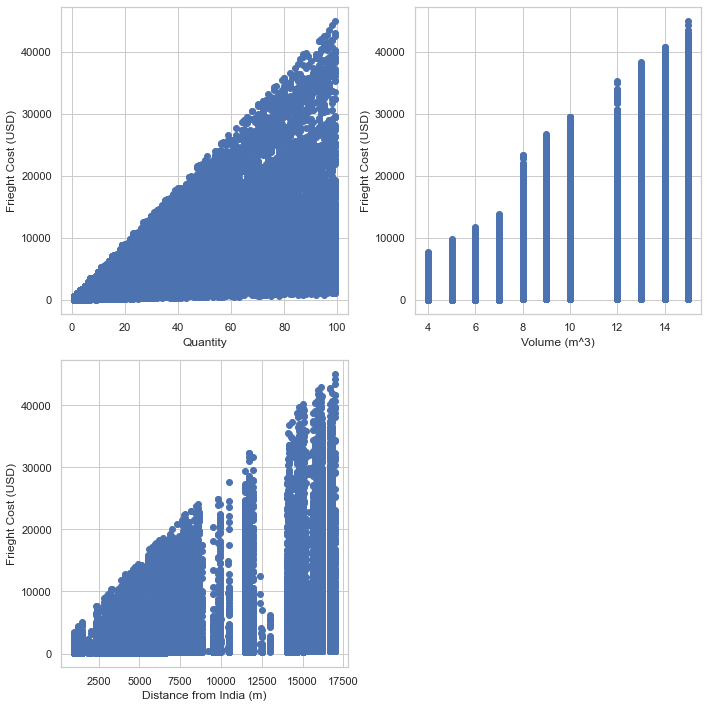

In [110]:
# Plotting a subplot
columns = X1.drop("Frieght Cost (USD)", axis="columns").columns
halfcol = math.ceil(len(columns)/2)
fig = plt.figure(figsize=(10,10))

for i in range(len(columns)):
    plt.subplot(halfcol, halfcol, i+1)
    column = columns[i]
    plt.xlabel(column)
    plt.ylabel("Frieght Cost (USD)")
    plt.scatter(X1[column], X1["Frieght Cost (USD)"])

fig.tight_layout()

In [134]:
# Performing Linear Regression
x = X1.drop("Frieght Cost (USD)", axis="columns")
y = X1["Frieght Cost (USD)"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
LR = linear_model.LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [135]:
# Getting the coefficients
mymodel.coef_

array([1.34650615e+02, 4.77532566e+02, 3.56705017e-01])

In [136]:
# Getting the intercept
mymodel.intercept_

-7469.4841093490895

In [137]:
# Predicting the x_test
mymodel.predict(x_test)

array([ 2835.39782494,  4363.58474986,  5537.90779419, ...,
        8126.26948415,   -73.62958316, 12660.6051739 ])

In [138]:
# Getting the y_test
y_test

17069      850.11
11770    4,199.44
76183    2,969.30
39950    1,652.17
38670    6,975.86
34165      766.61
45376   15,412.11
187        799.90
8601       301.36
61662      340.72
10455    2,234.13
38121      192.62
51235    3,351.20
39308      570.38
23028      148.61
9426       253.52
40344    2,807.61
60923    1,564.62
78465    1,907.21
6384     6,780.72
55671    1,231.03
60543      149.59
5560    17,184.96
15657      507.87
73438    2,056.76
74227    4,413.26
52808    1,762.01
8108     5,575.17
35015      660.00
28369    1,906.68
28938    5,491.03
50941    3,407.17
4584     1,065.91
2254    10,832.01
16688   12,246.75
74615      180.82
42650      511.08
60049      946.64
29345   12,081.95
22895      823.95
45144   24,960.43
67918    1,525.64
79016      376.71
20225    2,805.14
80861      122.63
40         747.99
45687    1,130.37
24646      901.41
79073    3,688.98
28029    6,259.80
54287      340.51
29139      745.29
54976      380.26
21677      587.21
39582      238.74
2558    22

In [139]:
# Checking the accuracy
mymodel.score(x_test,y_test)

0.7022687362587774

In [140]:
# Checking a predicted value
mymodel.predict([[34,12,5940.83050148322]])

array([4958.15161836])

In [141]:
# Checking another predicted value
mymodel.predict([[3,12,5940.83050148322]])

array([783.98256546])

In [142]:
# Random Forest Regressor

In [143]:
# Importing the library

from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(x_train,y_train) # Fitting the data

x_test_pred_RF = RF.predict(x_test)  #Predicted x_test

In [144]:
# Displaying the predicted x_test
x_test_pred_RF

array([  781.34577747,  4305.93605225,  2833.70253821, ...,
       10361.54757931,   684.58102424, 10809.76485085])

In [145]:
y_test   # y test

17069      850.11
11770    4,199.44
76183    2,969.30
39950    1,652.17
38670    6,975.86
34165      766.61
45376   15,412.11
187        799.90
8601       301.36
61662      340.72
10455    2,234.13
38121      192.62
51235    3,351.20
39308      570.38
23028      148.61
9426       253.52
40344    2,807.61
60923    1,564.62
78465    1,907.21
6384     6,780.72
55671    1,231.03
60543      149.59
5560    17,184.96
15657      507.87
73438    2,056.76
74227    4,413.26
52808    1,762.01
8108     5,575.17
35015      660.00
28369    1,906.68
28938    5,491.03
50941    3,407.17
4584     1,065.91
2254    10,832.01
16688   12,246.75
74615      180.82
42650      511.08
60049      946.64
29345   12,081.95
22895      823.95
45144   24,960.43
67918    1,525.64
79016      376.71
20225    2,805.14
80861      122.63
40         747.99
45687    1,130.37
24646      901.41
79073    3,688.98
28029    6,259.80
54287      340.51
29139      745.29
54976      380.26
21677      587.21
39582      238.74
2558    22

In [146]:
x_train_pred_RF = LR.predict(x_train)  # Predicted x_train
x_train_pred_RF 

array([ 5376.73476082,  2966.5600069 ,  5787.9818152 , ...,
       13956.77853763, -1933.8328935 , -2022.11576642])

In [147]:
y_train  # y train

18951    1,449.24
9155     3,169.03
6933     5,549.09
74056      382.89
35388    9,976.15
26963      423.26
79231    1,842.88
56368      198.97
28907    5,670.09
43794    3,044.06
37983    1,781.71
45799      963.08
6185     2,192.32
21317   13,507.60
53990      491.89
1327     9,973.40
65711    2,947.23
11649    3,542.14
15675    2,920.25
56019    3,352.43
67161      580.73
67074      340.72
79467    1,209.61
46185    3,467.10
43300      293.34
36001    1,062.64
45605      251.19
35970    3,542.14
5865     8,310.91
37565    4,521.49
51869    1,106.93
20110    1,779.40
40755    6,179.78
37188      478.19
40903   18,452.28
45316   20,309.41
77862      831.43
63510    1,192.82
10       5,153.57
21554    4,770.69
65157      306.95
12020    2,099.72
12098    9,968.38
40406      363.52
42580      163.48
54935    9,221.19
68311    2,009.55
588        823.95
36195      572.65
6947       472.26
44167    9,705.47
7148     1,534.86
9919     1,783.37
40060   13,714.08
79422      245.87
1806      

In [148]:
# Random Foresr Regressor Score

In [149]:
print('Training score for Random Forest Regressor is',RF.score(x_train,y_train))

Training score for Random Forest Regressor is 0.9995936717433325
